In [4]:
import pandas as pd
import matplotlib
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
 
from sklearn.metrics import accuracy_score,r2_score,mean_squared_error

from sklearn.preprocessing import StandardScaler,OneHotEncoder
from sklearn.pipeline import  Pipeline

In [5]:
input_data = pd.read_csv('input_datasets/Titanic-Dataset.csv')
input_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [6]:
data = input_data[['Sex','Ticket']]

In [7]:
import pandas as pd
from sklearn.preprocessing import OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline



# Columns to be transformed
cat_columns = ['Name', 'Sex', 'Ticket', 'Cabin', 'Embarked']

# Preprocessing for categorical data
steps = [
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
]
cat_pipeline = Pipeline(steps)

# Transform categorical columns
encoded = cat_pipeline.fit_transform(input_data[cat_columns])

# Get feature names after one-hot encoding
encoded_feature_names = cat_pipeline.named_steps['onehot'].get_feature_names_out(cat_columns)

# Combine transformed categorical columns with the rest of the DataFrame
encoded_df = pd.DataFrame(encoded.toarray(), columns=encoded_feature_names)
other_columns_df = input_data.drop(columns=cat_columns).reset_index(drop=True)
transformed_df = pd.concat([encoded_df, other_columns_df], axis=1)

print(transformed_df.head(4))






   Name_Abbing, Mr. Anthony  Name_Abbott, Mr. Rossmore Edward  \
0                       0.0                               0.0   
1                       0.0                               0.0   
2                       0.0                               0.0   
3                       0.0                               0.0   

   Name_Abbott, Mrs. Stanton (Rosa Hunt)  Name_Abelson, Mr. Samuel  \
0                                    0.0                       0.0   
1                                    0.0                       0.0   
2                                    0.0                       0.0   
3                                    0.0                       0.0   

   Name_Abelson, Mrs. Samuel (Hannah Wizosky)  \
0                                         0.0   
1                                         0.0   
2                                         0.0   
3                                         0.0   

   Name_Adahl, Mr. Mauritz Nils Martin  Name_Adams, Mr. John  \
0            

In [8]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
#import decision trees 
from sklearn.tree import DecisionTreeClassifier
# import gradient boost
from sklearn.ensemble import GradientBoostingClassifier
#import randomforest
from sklearn.ensemble import RandomForestClassifier
input_data.dropna(inplace=True)
Y = input_data['Survived']
X = input_data.drop(['Survived','Name','PassengerId'],axis=1)

X = cat_pipeline.fit_transform(X)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

model1 = DecisionTreeClassifier()
model1.fit(X_train, Y_train)
Y1_pred = model1.predict(X_test)


model2 = RandomForestClassifier()
model2.fit(X_train, Y_train)
Y2_pred = model2.predict(X_test)


score = accuracy_score(Y_test,Y1_pred)
print("Decision Tree Accuracy:",score)
LRscore =accuracy_score(Y_test,Y2_pred)
print("Random forest accuracy score : ",LRscore)




Decision Tree Accuracy: 0.7567567567567568
Random forest accuracy score :  0.6216216216216216


In [9]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

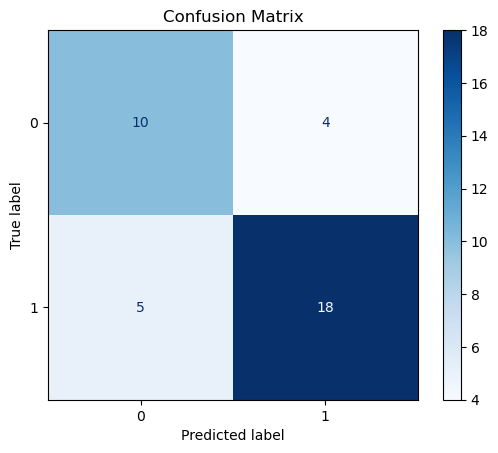

In [11]:
conf_matrix = confusion_matrix(Y_test, Y1_pred)

# Display the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=model1.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.show()